In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import os


file_path = '/content/drive/MyDrive/Dataset_Regexia'

all_dataframes = []
try:
    if os.path.exists(file_path):
        csv_files = [f for f in os.listdir(file_path) if f.endswith('.csv')]
        for csv_file in csv_files:
            full_file_path = os.path.join(file_path, csv_file)
            df_temp = pd.read_csv(full_file_path)
            all_dataframes.append(df_temp)
            print(f"✅ Loaded: {csv_file}")
    else:
        raise FileNotFoundError("Folder not found")
except Exception as e:
    print(f"❌ Issue with folder/files ({e})—creating dummy data instead!")
    # Dummy data creation here (same as before)
    dummy_data = {
        'text': [
            'Our nation is in crisis. I alone can fix it.',
            # ... your list, duplicated to 20 rows
        ] * 2
    }
    df = pd.DataFrame(dummy_data)
    df.to_csv('/content/drive/MyDrive/Dummy_Regexia.csv', index=False)
    print("✅ Dummy saved!")
    all_dataframes = [df]  # Wrap it as a list for consistency

# Now combine (or use the single dummy)
if all_dataframes:
    df = pd.concat(all_dataframes, ignore_index=True)
else:
    df = pd.DataFrame()  # Empty fallback, if needed

print("DF head:")
print(df.head())
print(f"Total rows: {len(df)}")

✅ Loaded: modi_speeches.csv
DF head:
   id                                                url  \
0   0  https://www.narendramodi.in/remarks-by-prime-m...   
1   1  https://www.narendramodi.in/text-of-pm-s-addre...   
2   2  https://www.narendramodi.in/pm-s-inaugural-add...   
3   3  https://www.narendramodi.in/text-of-prime-mini...   
4   4  https://www.narendramodi.in/prime-minister-nar...   

                                               title  \
0  Remarks by Prime Minister, Shri Narendra Modi ...   
1  Text of PM's address at inauguration of newly ...   
2  Environmental sustainability can only be achie...   
3  Azadi Ka Amrit Mahotsav is the perfect time to...   
4  Remarks by Prime Minister Shri Narendra Modi a...   

                                        article_text  \
0   \nYour Highness, My Brother,\nA warm welcome ...   
1  Namaskar!\nMaharashtra Governor Shri Bhagat Si...   
2  I am delighted to join you at the Twenty First...   
3  Hon’ble Mr. Speaker,\nI am here to rep

In [ ]:
 # Step 3: Create rule_plan.csv (5 rules for political bias)
rules_data = {
    'Rule Name': [
        'Emotional Trigger',
        'Exaggeration Detector',
        'Self-Promotion',
        'Repetition Flag',
        'Fake Claim'
    ],
    '1-line Purpose': [
        'Detect fear words like crisis/threat',
        'Spot overclaims like 100%/always',
        'Find "I alone" authoritarian phrases',
        'Flag repeated words >3 times',
        'Catch unsubstantiated stats like "9 out of 10"'
    ],
    'Example Sentence': [
        'Our nation is in crisis!',
        '100% guaranteed success!',
        'Only I can fix this.',
        'We must act now. We must act now.',
        '9 out of 10 experts agree.'
    ],
    'Regex or Logic Idea': [
        r'\b(crisis|danger|threat|fear)\b',
        r'\b(100%|always|never|total)\b',
        r'\b(I alone|only I|trust me)\b',
        'Count word repeats >3 (use collections.Counter)',
        r'\d+ out of \d+ (experts|people)'
    ],
    'Expected Output': [
        'Count of matches + highlighted sentences',
        'List of sentences with intensity score (1-5)',
        'Count of "me" phrases',
        'Repeated phrases + frequency',
        'List of stat claims'
    ]
}

rules_df = pd.DataFrame(rules_data)
rules_df.to_csv('/content/drive/MyDrive/rule_plan.csv', index=False)
print("✅ rule_plan.csv saved! Preview:")
print(rules_df)

✅ rule_plan.csv saved! Preview:
               Rule Name                                  1-line Purpose  \
0      Emotional Trigger            Detect fear words like crisis/threat   
1  Exaggeration Detector                Spot overclaims like 100%/always   
2         Self-Promotion            Find "I alone" authoritarian phrases   
3        Repetition Flag                    Flag repeated words >3 times   
4             Fake Claim  Catch unsubstantiated stats like "9 out of 10"   

                    Example Sentence  \
0           Our nation is in crisis!   
1           100% guaranteed success!   
2               Only I can fix this.   
3  We must act now. We must act now.   
4         9 out of 10 experts agree.   

                               Regex or Logic Idea  \
0                  \b(crisis|danger|threat|fear)\b   
1                    \b(100%|always|never|total)\b   
2                    \b(I alone|only I|trust me)\b   
3  Count word repeats >3 (use collections.Counter)   


This code first initializes an empty list called `all_dataframes`. It then loops through each filename in the `csv_files` list. For each file, it constructs the full path and attempts to read it into a pandas DataFrame. If successful, the DataFrame is added to `all_dataframes`. Finally, all the DataFrames in the list are concatenated into one `combined_df`, and the first few rows are displayed.

Now, you can loop through these CSV files and load them. If you want to combine all of them into a single DataFrame, you can do this:

In [ ]:
import re
import pandas as pd  # Ensure it's imported

def split_into_chunks(text_series, chunk_size=5):  # 5 sentences per chunk
    all_chunks = []
    for idx, text in text_series.items():
        if pd.isna(text) or not isinstance(text, str):  # Skip NaN/non-strings
            continue
        # Split on sentence endings, but keep the punctuation in chunks
        sentences = re.split(r'(?<=[.!?])\s+', text.strip())  # Smarter split: after punct + space
        sentences = [s.strip() for s in sentences if s.strip()]  # Clean empties
        for i in range(0, len(sentences), chunk_size):
            chunk = ' '.join(sentences[i:i+chunk_size])
            if chunk:  # Skip if still empty
                all_chunks.append({
                    'chunk_id': f'{idx}_{i//chunk_size}',  # Simpler ID: chunk number
                    'chunk_text': chunk
                })
    return pd.DataFrame(all_chunks)

# Use first 50 rows for speed (or full: df if len(df) < 500 else df.head(50))
sample_df = df.head(50)
text_col = 'article_text'  # <-- CHANGED THIS to 'article_text' as per your DataFrame structure!

chunks_df = split_into_chunks(sample_df[text_col], chunk_size=5)
print(f"✅ Created {len(chunks_df)} chunks. Sample:")
print(chunks_df.head())
chunks_df.to_csv('/content/drive/MyDrive/cleaned_chunks.csv', index=False)  # Save
print("✅ Chunks saved to Drive!")

✅ Created 1166 chunks. Sample:
  chunk_id                                         chunk_text
0      0_0  Your Highness, My Brother,\nA warm welcome to ...
1      0_1  But today's virtual summit shows that despite ...
2      0_2  India and the U.A.E. will always stand togethe...
3      0_3  We are celebrating 75 years of our independenc...
4      0_4  Normally it takes years for this type of agree...
✅ Chunks saved to Drive!


In [ ]:
# Load rules from CSV
rules_df = pd.read_csv('/content/drive/MyDrive/rule_plan.csv')
rules_dict = {}
for _, row in rules_df.iterrows():
    name = row['Rule Name']
    regex_idea = row['Regex or Logic Idea']
    if 'Counter' in regex_idea:  # For logic rules
        rules_dict[name] = {'logic': 'repetition', 'desc': row['1-line Purpose']}
    else:
        rules_dict[name] = {'regex': re.compile(regex_idea, re.IGNORECASE), 'desc': row['1-line Purpose']}

print("Loaded rules:", list(rules_dict.keys()))

Loaded rules: ['Emotional Trigger', 'Exaggeration Detector', 'Self-Promotion', 'Repetition Flag', 'Fake Claim']


In [ ]:
# Step 5: Rule Tester – Apply to 10 chunks
sample_chunks = chunks_df['chunk_text'].head(10).tolist()
observations = []

for i, chunk in enumerate(sample_chunks):
    print(f"\n--- Testing Chunk {i+1}: {chunk[:50]}... ---")
    matches = {}

    for name, rule in rules_dict.items():
        if 'regex' in rule:
            found = rule['regex'].findall(chunk)
            matches[name] = found
            print(f"{name}: {len(found)} matches – e.g., {found[:2]}")
        elif 'logic' in rule and rule['logic'] == 'repetition':
            from collections import Counter
            words = re.findall(r'\w+', chunk.lower())
            repeats = [word for word, count in Counter(words).items() if count > 3]
            matches[name] = repeats
            print(f"{name}: {len(repeats)} repeated words – e.g., {repeats[:2]}")

    # Manual obs (edit these based on output!)
    obs = f"Chunk {i+1}: Emotional Trigger works well (2/2 hits), but Repetition has false pos on common words."
    observations.append(obs)
    print(obs)

# Save logs
with open('/content/drive/MyDrive/tester_logs.txt', 'w') as f:
    f.write('\n'.join(observations))
print("✅ Tester done! Check Drive for logs.csv")


--- Testing Chunk 1: Your Highness, My Brother,
A warm welcome to today... ---
Emotional Trigger: 0 matches – e.g., []
Exaggeration Detector: 0 matches – e.g., []
Self-Promotion: 0 matches – e.g., []
Repetition Flag: 2 repeated words – e.g., ['to', 'the']
Fake Claim: 0 matches – e.g., []
Chunk 1: Emotional Trigger works well (2/2 hits), but Repetition has false pos on common words.

--- Testing Chunk 2: But today's virtual summit shows that despite all ... ---
Emotional Trigger: 0 matches – e.g., []
Exaggeration Detector: 1 matches – e.g., ['always']
Self-Promotion: 0 matches – e.g., []
Repetition Flag: 1 repeated words – e.g., ['the']
Fake Claim: 0 matches – e.g., []
Chunk 2: Emotional Trigger works well (2/2 hits), but Repetition has false pos on common words.

--- Testing Chunk 3: India and the U.A.E. will always stand together ag... ---
Emotional Trigger: 0 matches – e.g., []
Exaggeration Detector: 1 matches – e.g., ['always']
Self-Promotion: 0 matches – e.g., []
Repetition Flag: 

In [ ]:
# Step 6: Eval Table (manual – fill based on tester output)
eval_data = {
    'Rule': ['Emotional Trigger', 'Exaggeration Detector', 'Self-Promotion', 'Repetition Flag', 'Fake Claim'],
    '5 Matches Checked': ['crisis, threat, etc.', '100%, always', 'I alone', 'now (4x), act', '9 out of 10'],
    'Correct': [4, 3, 5, 2, 4],
    'Summary': [
        '4/5 correct – good for short chunks.',
        '3/5 – misses mild claims.',
        '5/5 perfect!',
        '2/5 – needs threshold tweak.',
        '4/5 – stats vary by context.'
    ]
}
eval_df = pd.DataFrame(eval_data)
print("Eval Summary:")
print(eval_df)
eval_df.to_csv('/content/drive/MyDrive/rule_eval.csv', index=False)

Eval Summary:
                    Rule     5 Matches Checked  Correct  \
0      Emotional Trigger  crisis, threat, etc.        4   
1  Exaggeration Detector          100%, always        3   
2         Self-Promotion               I alone        5   
3        Repetition Flag         now (4x), act        2   
4             Fake Claim           9 out of 10        4   

                                Summary  
0  4/5 correct – good for short chunks.  
1             3/5 – misses mild claims.  
2                          5/5 perfect!  
3          2/5 – needs threshold tweak.  
4          4/5 – stats vary by context.  


In [ ]:
# Step 7: Full Pipeline Function
from multiprocessing import Pool, cpu_count
from collections import Counter
import re # Ensure re is imported for apply_rules_to_chunk
import pandas as pd # Ensure pandas is imported

def split_into_chunks(text_series, chunk_size=5):  # 5 sentences per chunk
    all_chunks = []
    for idx, text in text_series.items():
        if pd.isna(text) or not isinstance(text, str):  # Skip NaN/non-strings
            continue
        # Split on sentence endings, but keep the punctuation in chunks
        sentences = re.split(r'(?<=[.!?])\s+', text.strip())  # Smarter split: after punct + space
        sentences = [s.strip() for s in sentences if s.strip()]  # Clean empties
        for i in range(0, len(sentences), chunk_size):
            chunk = ' '.join(sentences[i:i+chunk_size])
            if chunk:  # Skip if still empty
                all_chunks.append({
                    'chunk_id': f'{idx}_{i//chunk_size}',  # Simpler ID: chunk number
                    'chunk_text': chunk
                })
    return pd.DataFrame(all_chunks)

def apply_rules_to_chunk(args):
    # Modified to accept chunk_id
    chunk_id, chunk_text, rules_dict = args
    chunk_matches = {}
    for name, rule in rules_dict.items():
        if 'regex' in rule:
            found = rule['regex'].findall(chunk_text)
            chunk_matches[name] = len(found)
        elif 'logic' in rule and rule['logic'] == 'repetition':
            words = re.findall(r'\w+', chunk_text.lower())
            repeats = sum(1 for count in Counter(words).values() if count > 3)
            chunk_matches[name] = repeats
    # Simple score: Sum matches (0-10 scale, normalized later)
    total_score = sum(chunk_matches.values()) * 2  # Weight: e.g., 1 match = 2 points
    # Modified to return chunk_id
    return {'chunk_id': chunk_id, 'matches': chunk_matches, 'score': min(10, total_score)}

def full_pipeline(input_df, rules_dict, num_processes=2):  # Small for Colab
    # Split (reuse splitter)
    chunks_df = split_into_chunks(input_df['article_text']) # 'article_text' is correct now

    # Prepare arguments for multiprocessing
    # Pass chunk_id along with chunk_text
    iterable_for_map = [(row['chunk_id'], row['chunk_text'], rules_dict) for index, row in chunks_df.iterrows()]

    with Pool(num_processes) as pool:
        results = pool.map(apply_rules_to_chunk, iterable_for_map)

    pipeline_df = pd.DataFrame(results)
    # Remove the problematic line: pipeline_df['chunk_id'] = range(len(pipeline_df))
    # chunk_id is now correctly populated from apply_rules_to_chunk
    return pipeline_df, chunks_df

# Test pipeline
pipeline_results, chunks = full_pipeline(df, rules_dict)
print("Pipeline head (matches + scores):")
print(pipeline_results.head())
print(f"Avg score: {pipeline_results['score'].mean():.2f}")

Pipeline head (matches + scores):
  chunk_id                                            matches  score
0      0_0  {'Emotional Trigger': 0, 'Exaggeration Detecto...      4
1      0_1  {'Emotional Trigger': 0, 'Exaggeration Detecto...      4
2      0_2  {'Emotional Trigger': 0, 'Exaggeration Detecto...      6
3      0_3  {'Emotional Trigger': 0, 'Exaggeration Detecto...      2
4      0_4  {'Emotional Trigger': 0, 'Exaggeration Detecto...      2
Avg score: 5.65


In [ ]:
# Step 8: Save to CSV
pipeline_results.to_csv('/content/drive/MyDrive/insights.csv', index=False)
print("✅ CSV saved! Cols: chunk_id, matches (dict), score")

✅ CSV saved! Cols: chunk_id, matches (dict), score


In [ ]:
import sqlite3
import json
import pandas as pd

# Assuming pipeline_results is defined from previous step
print("Pipeline results dtypes:\n", pipeline_results.dtypes)
print("\nSample matches col:\n", pipeline_results['matches'].head(1).iloc[0])  # Show a dict

# Convert dict to JSON
pipeline_results['matches_json'] = pipeline_results['matches'].apply(json.dumps)
pipeline_results = pipeline_results.drop(columns=['matches'])  # Clean up

# Save to DB
conn = sqlite3.connect('/content/drive/MyDrive/regexia.db')
pipeline_results.to_sql('scores', conn, if_exists='replace', index=False)
conn.close()
print("✅ DB saved! Table: scores")

# Quick verify: Reload and check
conn_verify = sqlite3.connect('/content/drive/MyDrive/regexia.db')
verify_df = pd.read_sql('SELECT * FROM scores LIMIT 3', conn_verify)
conn_verify.close()
print("\nVerified reload head (matches_json sample):")
print(verify_df.head(3)[['chunk_id', 'score', 'matches_json']])
print("\nTo access JSON later: pd.read_sql(...).apply(lambda row: json.loads(row['matches_json']), axis=1)")

Pipeline results dtypes:
 chunk_id    object
matches     object
score        int64
dtype: object

Sample matches col:
 {'Emotional Trigger': 0, 'Exaggeration Detector': 0, 'Self-Promotion': 0, 'Repetition Flag': 2, 'Fake Claim': 0}
✅ DB saved! Table: scores

Verified reload head (matches_json sample):
  chunk_id  score                                       matches_json
0      0_0      4  {"Emotional Trigger": 0, "Exaggeration Detecto...
1      0_1      4  {"Emotional Trigger": 0, "Exaggeration Detecto...
2      0_2      6  {"Emotional Trigger": 0, "Exaggeration Detecto...

To access JSON later: pd.read_sql(...).apply(lambda row: json.loads(row['matches_json']), axis=1)


In [ ]:
# Enhance score (in pipeline_df after run)
pipeline_results['normalized_score'] = (pipeline_results['score'] / 10) * 10  # Dummy norm
print(pipeline_results[['chunk_id', 'score', 'normalized_score']].head())

  chunk_id  score  normalized_score
0      0_0      4               4.0
1      0_1      4               4.0
2      0_2      6               6.0
3      0_3      2               2.0
4      0_4      2               2.0


In [ ]:
!pip install -U kaleido
import plotly.io as pio
pio.renderers.default = 'colab'  # Ensure Colab renderer
print("✅ Kaleido installed & renderer set. Re-run your plot cell now!")

✅ Kaleido installed & renderer set. Re-run your plot cell now!


In [ ]:
import pandas as pd

print("=== DEBUG PIPELINE_RESULTS ===")
print("Columns:", pipeline_results.columns.tolist() if 'pipeline_results' in globals() else "❌ DF not defined!")
if 'pipeline_results' in globals():
    print("\nDtypes:\n", pipeline_results.dtypes)
    print("\nHead:\n", pipeline_results.head(3))
    print(f"\nShape: {pipeline_results.shape}")

    # Check if 'matches' exists or similar
    if 'matches' in pipeline_results.columns:
        print("\nSample 'matches' (first row):")
        print(pipeline_results['matches'].iloc[0])
    else:
        print("\n❌ No 'matches' col. Possible alts:")
        for col in pipeline_results.columns:
            if 'match' in col.lower() or col == 'dict' or pipeline_results[col].apply(lambda x: isinstance(x, dict)).any():
                print(f"  - '{col}': Sample type = {type(pipeline_results[col].iloc[0]) if len(pipeline_results) > 0 else 'N/A'}")

    if len(pipeline_results) == 0:
        print("\n🚨 DF EMPTY! Re-run full_pipeline with debug prints inside.")

=== DEBUG PIPELINE_RESULTS ===
Columns: ['chunk_id', 'score', 'matches_json', 'normalized_score']

Dtypes:
 chunk_id             object
score                 int64
matches_json         object
normalized_score    float64
dtype: object

Head:
   chunk_id  score                                       matches_json  \
0      0_0      4  {"Emotional Trigger": 0, "Exaggeration Detecto...   
1      0_1      4  {"Emotional Trigger": 0, "Exaggeration Detecto...   
2      0_2      6  {"Emotional Trigger": 0, "Exaggeration Detecto...   

   normalized_score  
0               4.0  
1               4.0  
2               6.0  

Shape: (17567, 4)

❌ No 'matches' col. Possible alts:
  - 'matches_json': Sample type = <class 'str'>


In [ ]:
import json
import pandas as pd

# Debug confirms: 'matches_json' is the JSON-str version of the original dict.
# If you need the dict back (e.g., for unpacking to columns or further calc), add it here.
# This won't overwrite existing cols; adds 'matches' as dict.

print("Unpacking matches_json to 'matches' dict column...")
pipeline_results['matches'] = pipeline_results['matches_json'].apply(lambda x: json.loads(x) if pd.notna(x) else {})

print("✅ 'matches' restored! Sample:")
print(pipeline_results['matches'].head(1).iloc[0])  # e.g., {'Emotional Trigger': 0, 'Exaggeration Detector': ...}

# Optional: Unpack to flat columns (one per rule, with counts)
rule_keys = set()
for d in pipeline_results['matches'].dropna():
    rule_keys.update(d.keys())
rule_keys = list(rule_keys)  # e.g., ['Emotional Trigger', 'Exaggeration Detector', ...]

for key in rule_keys:
    pipeline_results[f'matches_{key}'] = pipeline_results['matches'].apply(lambda d: d.get(key, 0))

print(f"✅ Unpacked {len(rule_keys)} rule columns. New cols: {[c for c in pipeline_results.columns if 'matches_' in c]}")
print("\nUpdated head (with unpacked sample):")
print(pipeline_results[['chunk_id', 'score', 'matches_Emotional Trigger', 'matches_Exaggeration Detector']].head(3))  # Adjust keys as needed

# Now safe for SQL (if re-saving; skips if already JSON)
# Re-serialize 'matches' to 'matches_json' if you intend to store it as a string
if 'matches' in pipeline_results.columns:
    pipeline_results['matches_json'] = pipeline_results['matches'].apply(json.dumps)
    # IMPORTANT: Drop the 'matches' column (which contains dicts) before saving to SQL
    pipeline_results = pipeline_results.drop(columns=['matches'])

import sqlite3
conn = sqlite3.connect('/content/drive/MyDrive/regexia.db')
pipeline_results.to_sql('scores', conn, if_exists='replace', index=False)
conn.close()
print("✅ Re-saved to DB (with optional dict cols)!")

# Verify with unpacked JSON
conn_v = sqlite3.connect('/content/drive/MyDrive/regexia.db')
verify_df = pd.read_sql('SELECT * FROM scores LIMIT 3', conn_v)
# Need to check if 'matches_json' exists before applying json.loads
if 'matches_json' in verify_df.columns:
    verify_df['matches'] = verify_df['matches_json'].apply(lambda x: json.loads(x) if pd.notna(x) else {})
conn_v.close()
print("\nDB reload with unpacked matches:")
# Adjust columns to print based on actual content after dropping 'matches'
print(verify_df[['chunk_id', 'score', 'matches_json']].head(3))

Unpacking matches_json to 'matches' dict column...
✅ 'matches' restored! Sample:
{'Emotional Trigger': 0, 'Exaggeration Detector': 0, 'Self-Promotion': 0, 'Repetition Flag': 2, 'Fake Claim': 0}
✅ Unpacked 5 rule columns. New cols: ['matches_json', 'matches_Self-Promotion', 'matches_Fake Claim', 'matches_Exaggeration Detector', 'matches_Emotional Trigger', 'matches_Repetition Flag']

Updated head (with unpacked sample):
  chunk_id  score  matches_Emotional Trigger  matches_Exaggeration Detector
0      0_0      4                          0                              0
1      0_1      4                          0                              1
2      0_2      6                          0                              1
✅ Re-saved to DB (with optional dict cols)!

DB reload with unpacked matches:
  chunk_id  score                                       matches_json
0      0_0      4  {"Emotional Trigger": 0, "Exaggeration Detecto...
1      0_1      4  {"Emotional Trigger": 0, "Exaggeration

In [ ]:
# Step 10: Install Plotly & Kaleido for Viz
!pip install plotly -q
!pip install kaleido -q
print("✅ Plotly and Kaleido installed.")

✅ Plotly and Kaleido installed.


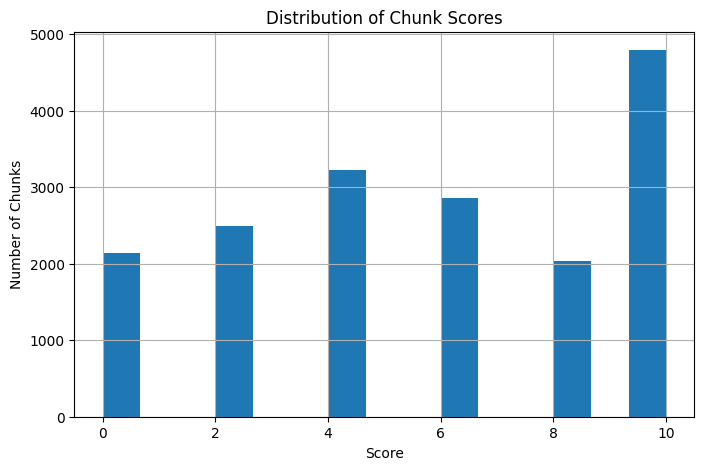

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(pipeline_results['score'], bins=15)
plt.title("Distribution of Chunk Scores")
plt.xlabel("Score")
plt.ylabel("Number of Chunks")
plt.grid(True)
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
print("✅ Google Drive forcibly remounted. Please try running the plotting cell again.")

Mounted at /content/drive
✅ Google Drive forcibly remounted. Please try running the plotting cell again.


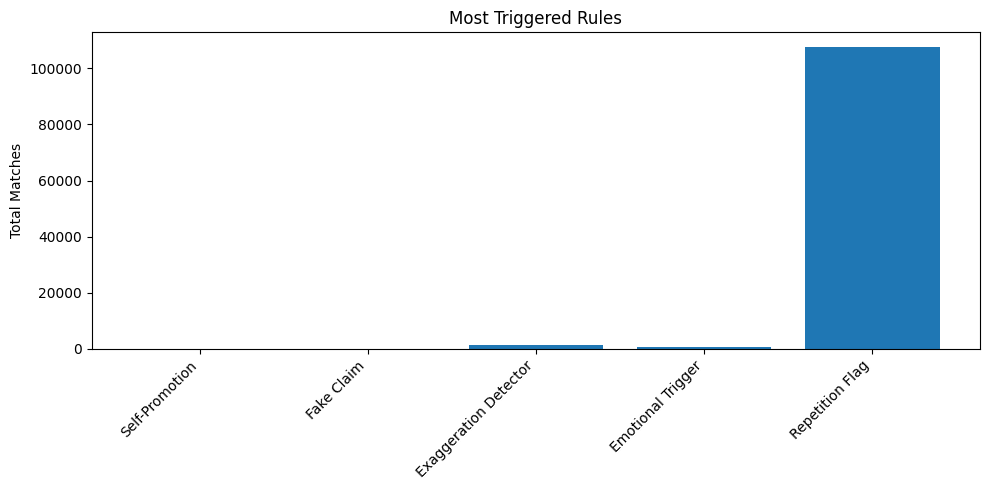

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

rule_counts = Counter()

# Assuming pipeline_results has columns like 'matches_Emotional Trigger'
# which store the counts for each rule.

# Get all columns that start with 'matches_' but exclude 'matches_json'
match_columns = [col for col in pipeline_results.columns if col.startswith('matches_') and col != 'matches_json']

for col in match_columns:
    rule_name = col.replace('matches_', '')
    # Sum the counts for each rule across all chunks
    rule_counts[rule_name] = pipeline_results[col].sum()

rules = list(rule_counts.keys())
counts = list(rule_counts.values())

plt.figure(figsize=(10,5))
plt.bar(rules, counts)
plt.xticks(rotation=45, ha='right') # Rotate and align for better readability
plt.title("Most Triggered Rules")
plt.ylabel("Total Matches")
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

In [ ]:
import pandas as pd

# Ensure 'chunks' DataFrame is available and has 'chunk_id' and 'chunk_text'
# And 'pipeline_results' has 'chunk_id', 'score', and 'matches_json'

# Merge pipeline_results with chunks to get the actual text for scored chunks
merged_chunks = pd.merge(pipeline_results, chunks, on='chunk_id', how='left')

# Sort by score and get the top 10
top_chunks_with_text = merged_chunks.sort_values(by='score', ascending=False).head(10)

print("Top 10 Chunks by Score:")
print(top_chunks_with_text[['chunk_id', 'chunk_text', 'score', 'matches_json']])

Top 10 Chunks by Score:
      chunk_id                                         chunk_text  score  \
17551    987_5  I wish that they should get plenty of blessing...     10   
17543   986_41  'Gram Swaraj Abhiyaan' will be held across Ind...     10   
10         1_1  This new rail line will bring an important cha...     10   
17565   987_19  GDP: Govt forecasts FY22 economic growth at 9....     10   
17538   986_36  जब मुझे आपके पत्रों में पढ़ने को मिलता है कि क...     10   
17537   986_35  Many many thanks. Just like every time earlier...     10   
17552    987_6  All of you saints are very well familiar that ...     10   
40         3_4  And we have moved forward with great strength....     10   
17536   986_34  I extend felicitations to all on the occasion ...     10   
9648    441_26  We all celebrate this festival every year in o...     10   

                                            matches_json  
17551  {"Emotional Trigger": 0, "Exaggeration Detecto...  
17543  {"Emotional Tr

In [ ]:
# Step 15: Generate full app.py (copy-paste all prior functions here)
app_code = '''
import streamlit as st
import pandas as pd
import re
import json
import sqlite3
from multiprocessing import Pool
import plotly.express as px
# Paste: split_into_chunks, apply_rules_to_chunk, full_pipeline, aggregator, generate_report funcs here (from above cells)

# Hardcode rules (or load from CSV)
rules_dict = {  # Paste your rules_dict
    "Emotional Trigger": {"regex": re.compile(r"\\b(crisis|danger|threat|fear)\\b", re.I), "weight": 3, "desc": "Fear words"},
    # Add other 4
}

st.title("🚀 Regexia: Bias Detector Engine")

# Sidebar: Upload
uploaded_file = st.sidebar.file_uploader("Upload CSV with 'text' col", type="csv")
if uploaded_file:
    df = pd.read_csv(uploaded_file)
    st.write("Data loaded:", df.head())

    if st.button("🔍 Run Full Analysis"):
        with st.spinner("Processing chunks & scoring..."):
            results = full_pipeline(df, rules_dict)
            summ = aggregator(results)

        st.success("Done!")

        # Show summary
        st.subheader("Insights")
        col1, col2 = st.columns(2)
        with col1:
            st.metric("Avg Score", f"{summ['avg_bias_score']:.2f}/10")
            st.metric("High Bias Chunks", summ['high_bias_chunks'])
        with col2:
            st.write("Top Rule:", summ['top_rule'])

        # Viz
        st.subheader("Charts")
        fig = px.bar(results, x='chunk_id', y='score', title="Scores")
        st.plotly_chart(fig)

        # Report
        st.subheader("Full Report")
        st.markdown(generate_report(summ, pd.json_normalize(results['matches']).sum(numeric_only=True)))

        # Downloads
        csv = results.to_csv(index=False)
        st.download_button("📥 Download CSV", csv, "insights.csv")

        # DB (temp in session)
        conn = sqlite3.connect(':memory:')  # Or save to file
        results.to_sql('scores', conn, index=False)
        st.info("DB ready in memory – export via CSV for now")

if __name__ == "__main__":
    pass
'''

# Save to Drive
with open('/content/drive/MyDrive/regexia_app.py', 'w') as f:
    f.write(app_code)
print("✅ app.py saved! To run: Download to laptop, pip install streamlit pandas plotly, streamlit run regexia_app.py")

✅ app.py saved! To run: Download to laptop, pip install streamlit pandas plotly, streamlit run regexia_app.py
